<a href="https://colab.research.google.com/github/fardsnog2/ML_vvsu/blob/main/Georgy_ml_vvsu_first_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

1)

НУ тут база загрузка данных

In [2]:
df = pd.read_excel('/content/moviedb.xlsx').drop(columns=['Unnamed: 0'])
# сразу меняю рейтинг на классы так как задача классификации же...
df['rating'] = df['rating'].apply(lambda x: 'Плохо' if x<=4.0 else 'Средний' if x>4.0 and x<7.0 else 'Отличный' if x>=7.0 else x)

In [3]:
df

,title,release,runtime,budget,revenue,lang,genre1,genre2,country1,country2,...,writer,studio1,studio2,keyword1,keyword2,keyword3,keyword4,keyword5,keyword6,rating
0,"""Vegeta"" (Shrek)",NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Плохо
1,'93: Del Soul,2021-07-18 00:00:00,15.0,250.0,NaN,en,детектив,триллер,NaN,NaN,...,Riley Lockhart,Elkman Productions,NaN,sports car,psychological stress,axe murder,horror filmmaking,1990s,carsploitation,Плохо
2,'Catch Me If You Can': Behind the Camera,2003-05-06 00:00:00,17.0,NaN,NaN,NaN,документальный,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Отличный
3,'Harry Potter': Behind the Magic,2005-11-19 00:00:00,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Отличный
4,"'Oh, Miss Jones!': The Very Best of Leonard Ro...",1996-08-16 00:00:00,52.0,NaN,NaN,en,документальный,NaN,GB,NaN,...,NaN,Telegram,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Средний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,Белфаст,2021-11-12 00:00:00,98.0,NaN,30000000.0,en,драма,NaN,GB,NaN,...,Kenneth Branagh,Northern Ireland Screen,TKBC,working class,black and white,"belfast, north ireland",1960s,NaN,NaN,Отличный
10278,Финч,2021-11-04 00:00:00,115.0,2500000.0,500000000.0,en,фантастика,драма,US,NaN,...,Ivor Powell,Amblin Entertainment,ImageMovers,robot,journey,humanity,post-apocalyptic,NaN,NaN,Отличный
10279,Под гипнозом,2021-10-27 00:00:00,88.0,NaN,NaN,en,триллер,драма,CA,NaN,...,Richard D'Ovidio,The Long Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Средний
10280,Последняя дуэль,2021-10-13 00:00:00,152.0,100000000.0,27000000.0,en,боевик,драма,GB,US,...,NaN,20th Century Studios,Scott Free Productions,based on novel or book,"normandy, france",based on true story,knight,duel,historical,Отличный


Статистика какая-то банальная

In [4]:
df.describe()

,runtime,budget,revenue
count,10130.000000,4.119000e+03,4.113000e+03
mean,88.593287,3.986407e+07,1.177812e+08
std,40.281324,4.822654e+07,2.064450e+08
min,0.000000,1.000000e+00,1.000000e+00
25%,83.000000,7.500000e+06,9.128263e+06
50%,96.000000,2.200000e+07,4.266441e+07
75%,109.000000,5.200000e+07,1.293948e+08
max,840.000000,3.800000e+08,2.797801e+09


инфа про пустые

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     10282 non-null  object 
 1   release   10020 non-null  object 
 2   runtime   10130 non-null  float64
 3   budget    4119 non-null   float64
 4   revenue   4113 non-null   float64
 5   lang      8972 non-null   object 
 6   genre1    9322 non-null   object 
 7   genre2    6558 non-null   object 
 8   country1  8748 non-null   object 
 9   country2  2102 non-null   object 
 10  actor1    9277 non-null   object 
 11  actor2    8992 non-null   object 
 12  actor3    8752 non-null   object 
 13  actor4    8539 non-null   object 
 14  actor5    8301 non-null   object 
 15  director  9575 non-null   object 
 16  writer    7052 non-null   object 
 17  studio1   7461 non-null   object 
 18  studio2   6172 non-null   object 
 19  keyword1  7201 non-null   object 
 20  keyword2  6398 non-null   ob

Удалим сразу те столбцы где менее 7к не null значений,кроме бюджета и выручки

In [6]:
df_drop = df.drop(columns=['country2','keyword3','keyword4','keyword5','keyword6','genre2','studio2','keyword2'])
df_drop

,title,release,runtime,budget,revenue,lang,genre1,country1,actor1,actor2,actor3,actor4,actor5,director,writer,studio1,keyword1,rating
0,"""Vegeta"" (Shrek)",NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Плохо
1,'93: Del Soul,2021-07-18 00:00:00,15.0,250.0,NaN,en,детектив,NaN,Kylie Lockhart,Riley Lockhart,NaN,NaN,NaN,Riley Lockhart,Riley Lockhart,Elkman Productions,sports car,Плохо
2,'Catch Me If You Can': Behind the Camera,2003-05-06 00:00:00,17.0,NaN,NaN,NaN,документальный,NaN,Frank Abagnale Jr.,Steven Spielberg,Tom Hanks,Leonardo DiCaprio,Amy Adams,Laurent Bouzereau,NaN,NaN,NaN,Отличный
3,'Harry Potter': Behind the Magic,2005-11-19 00:00:00,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Отличный
4,"'Oh, Miss Jones!': The Very Best of Leonard Ro...",1996-08-16 00:00:00,52.0,NaN,NaN,en,документальный,GB,Leonard Rossiter,John Barron,Sue Nicholls,Tim Preece,Bruce Bould,Will Trotter,NaN,Telegram,NaN,Средний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10277,Белфаст,2021-11-12 00:00:00,98.0,NaN,30000000.0,en,драма,GB,Jude Hill,Caitríona Balfe,Jamie Dornan,Judi Dench,Ciarán Hinds,Kenneth Branagh,Kenneth Branagh,Northern Ireland Screen,working class,Отличный
10278,Финч,2021-11-04 00:00:00,115.0,2500000.0,500000000.0,en,фантастика,US,Tom Hanks,Caleb Landry Jones,Oscar Avila,Lora Martinez-Cunningham,Marie Wagenman,Miguel Sapochnik,Ivor Powell,Amblin Entertainment,robot,Отличный
10279,Под гипнозом,2021-10-27 00:00:00,88.0,NaN,NaN,en,триллер,CA,Kate Siegel,Jason O'Mara,Dulé Hill,Lucie Guest,Jaime M. Callica,Matt Angel,Richard D'Ovidio,The Long Game,NaN,Средний
10280,Последняя дуэль,2021-10-13 00:00:00,152.0,100000000.0,27000000.0,en,боевик,GB,Matt Damon,Adam Driver,Jodie Comer,Harriet Walter,Ben Affleck,Ridley Scott,NaN,20th Century Studios,based on novel or book,Отличный


Графики какие-то предложил коллаб и я рад

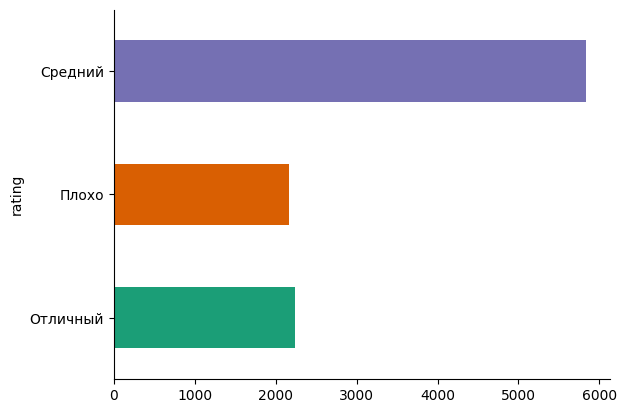

In [7]:
# @title rating

from matplotlib import pyplot as plt
import seaborn as sns
df_drop.groupby('rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

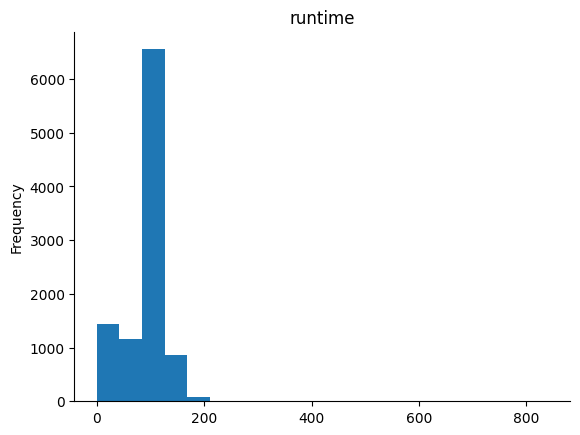

In [8]:
# @title runtime

from matplotlib import pyplot as plt
df_drop['runtime'].plot(kind='hist', bins=20, title='runtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

так же стоит удалить актеров3-5 м название релиз
хочу оставить только бюджет, выручку, длительность и жанр, чтобы предсказать рейтинг так как выдвину гипотезу что рейтинг можно пресказать по этим данным

In [9]:
df_drop = df_drop.drop(columns = ['actor3','actor4','actor5','title'])
df_drop= df_drop.drop(columns = ['release'])
df_drop= df_drop.drop(columns = ['studio1','lang','country1','actor1','actor2','director','writer'])
df_drop= df_drop.drop(columns = ['keyword1'])

In [10]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  10130 non-null  float64
 1   budget   4119 non-null   float64
 2   revenue  4113 non-null   float64
 3   genre1   9322 non-null   object 
 4   rating   10240 non-null  object 
dtypes: float64(3), object(2)
memory usage: 401.8+ KB


Заполняю пустые значения по моде

In [11]:
df_drop.genre1.fillna(df_drop.genre1.mode(), inplace = True)

In [12]:
df_drop

,runtime,budget,revenue,genre1,rating
0,99.0,NaN,NaN,драма,Плохо
1,15.0,250.0,NaN,детектив,Плохо
2,17.0,NaN,NaN,документальный,Отличный
3,48.0,NaN,NaN,NaN,Отличный
4,52.0,NaN,NaN,документальный,Средний
...,...,...,...,...,...
10277,98.0,NaN,30000000.0,драма,Отличный
10278,115.0,2500000.0,500000000.0,фантастика,Отличный
10279,88.0,NaN,NaN,триллер,Средний
10280,152.0,100000000.0,27000000.0,боевик,Отличный


для жанра использую моду для бюджета и выручки медиану

In [13]:
df_drop.budget.fillna(df_drop.budget.median(),inplace=True)
df_drop.revenue.fillna(df_drop.revenue.median(),inplace=True)
df_drop.runtime.fillna(df_drop.runtime.median(),inplace=True)
df_drop.genre1.fillna(df_drop.genre1.mode(),inplace=True)

In [14]:
df_drop.genre1.fillna('драма')

0                 драма
1              детектив
2        документальный
3                 драма
4        документальный
              ...      
10277             драма
10278        фантастика
10279           триллер
10280            боевик
10281             драма
Name: genre1, Length: 10282, dtype: object

In [15]:
df_drop['genre1'].isna().sum()

959

In [16]:
df_drop.describe()

,runtime,budget,revenue
count,10282.000000,1.028200e+04,1.028200e+04
mean,88.702782,2.915640e+07,7.271259e+07
std,39.992436,3.175252e+07,1.356485e+08
min,0.000000,1.000000e+00,1.000000e+00
25%,83.000000,2.200000e+07,4.266441e+07
50%,96.000000,2.200000e+07,4.266441e+07
75%,109.000000,2.200000e+07,4.266441e+07
max,840.000000,3.800000e+08,2.797801e+09


In [17]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  10282 non-null  float64
 1   budget   10282 non-null  float64
 2   revenue  10282 non-null  float64
 3   genre1   9323 non-null   object 
 4   rating   10240 non-null  object 
dtypes: float64(3), object(2)
memory usage: 401.8+ KB


In [18]:
df_drop.dropna(subset=['genre1'])
df_drop

,runtime,budget,revenue,genre1,rating
0,99.0,22000000.0,42664410.0,драма,Плохо
1,15.0,250.0,42664410.0,детектив,Плохо
2,17.0,22000000.0,42664410.0,документальный,Отличный
3,48.0,22000000.0,42664410.0,NaN,Отличный
4,52.0,22000000.0,42664410.0,документальный,Средний
...,...,...,...,...,...
10277,98.0,22000000.0,30000000.0,драма,Отличный
10278,115.0,2500000.0,500000000.0,фантастика,Отличный
10279,88.0,22000000.0,42664410.0,триллер,Средний
10280,152.0,100000000.0,27000000.0,боевик,Отличный


In [19]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  10282 non-null  float64
 1   budget   10282 non-null  float64
 2   revenue  10282 non-null  float64
 3   genre1   9323 non-null   object 
 4   rating   10240 non-null  object 
dtypes: float64(3), object(2)
memory usage: 401.8+ KB


In [20]:
df_drop['genre1'] = df_drop['genre1']. fillna ('драма')

In [21]:
df_drop

,runtime,budget,revenue,genre1,rating
0,99.0,22000000.0,42664410.0,драма,Плохо
1,15.0,250.0,42664410.0,детектив,Плохо
2,17.0,22000000.0,42664410.0,документальный,Отличный
3,48.0,22000000.0,42664410.0,драма,Отличный
4,52.0,22000000.0,42664410.0,документальный,Средний
...,...,...,...,...,...
10277,98.0,22000000.0,30000000.0,драма,Отличный
10278,115.0,2500000.0,500000000.0,фантастика,Отличный
10279,88.0,22000000.0,42664410.0,триллер,Средний
10280,152.0,100000000.0,27000000.0,боевик,Отличный


In [22]:
df_drop=df_drop.dropna(subset=['rating'])

In [23]:
df_drop

,runtime,budget,revenue,genre1,rating
0,99.0,22000000.0,42664410.0,драма,Плохо
1,15.0,250.0,42664410.0,детектив,Плохо
2,17.0,22000000.0,42664410.0,документальный,Отличный
3,48.0,22000000.0,42664410.0,драма,Отличный
4,52.0,22000000.0,42664410.0,документальный,Средний
...,...,...,...,...,...
10277,98.0,22000000.0,30000000.0,драма,Отличный
10278,115.0,2500000.0,500000000.0,фантастика,Отличный
10279,88.0,22000000.0,42664410.0,триллер,Средний
10280,152.0,100000000.0,27000000.0,боевик,Отличный


Все что выше пытался заполнить пустыми и я е... это оно не хотело

In [24]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10240 entries, 0 to 10281
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runtime  10240 non-null  float64
 1   budget   10240 non-null  float64
 2   revenue  10240 non-null  float64
 3   genre1   10240 non-null  object 
 4   rating   10240 non-null  object 
dtypes: float64(3), object(2)
memory usage: 480.0+ KB


библия статмоделей для аналитика

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

делю на х и у

In [26]:
X=df_drop.drop(columns=['rating'])
Y = df_drop['rating']
X

,runtime,budget,revenue,genre1
0,99.0,22000000.0,42664410.0,драма
1,15.0,250.0,42664410.0,детектив
2,17.0,22000000.0,42664410.0,документальный
3,48.0,22000000.0,42664410.0,драма
4,52.0,22000000.0,42664410.0,документальный
...,...,...,...,...
10277,98.0,22000000.0,30000000.0,драма
10278,115.0,2500000.0,500000000.0,фантастика
10279,88.0,22000000.0,42664410.0,триллер
10280,152.0,100000000.0,27000000.0,боевик


2)

делаю стандартизацию
и сразу лабел но он временно чисто для статсмоделей

In [27]:
scaler = MinMaxScaler()
le = LabelEncoder()
X[['runtime','budget','revenue']] = scaler.fit_transform(X[['runtime','budget','revenue']])
X['genre1'] = le.fit_transform(X['genre1'])
Y=le.fit_transform(Y)

ну тут вывожу коэф параметров регрессии

In [28]:
X = sm.add_constant(X)
mod = sm.OLS(Y.astype(float),X.astype(float))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     77.28
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.11e-64
Time:                        09:31:07   Log-Likelihood:                -12293.
No. Observations:               10240   AIC:                         2.460e+04
Df Residuals:                   10235   BIC:                         2.463e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1277      0.024     47.924      0.000       1.082       1.174
runtime        0.6306      0.121      5.208      0.000       0.393       0.868
budget         1.5460      0.144     10.714      0.000       1.263       1.829
revenue       -3.7497      0.251    -14.921      0.000      -4.242      -3.257
genre1         0.0149      0.002      8.648      0.000       0.012       0.018
==============================================================================
Omnibus:                     2479.722   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1318.873
Skew:                          -0.743   Prob(JB):                    4.08e-287
Kurtosis:                       2.059   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Все значимы так как p-value везде меньше 0.05

3)

метрика ну аккуренси precall precision f1

4)

нуууу модели фит предикт наше все

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

иниициализация моделей

In [30]:
model_lr = LogisticRegression()
model_rfc = RandomForestClassifier()
model_knn = KNeighborsClassifier(n_neighbors=10)

А щас жанр верну и его в one-hot

In [31]:
X=df_drop.drop(columns=['rating'])
Y = df_drop['rating']
Y=le.fit_transform(Y)
X[['runtime','budget','revenue']] = scaler.fit_transform(X[['runtime','budget','revenue']])
# X['genre1'] = pd.get_dummies(X['genre1'])
X=pd.get_dummies (X, columns=['genre1'])

делю на тест и трэин для обучения и проверки

In [32]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

обучаю все наши модели

In [ ]:
model_lr=model_lr.fit(X_train,y_train)
model_rfc=model_rfc.fit(X_train,y_train)
model_knn=model_knn.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
y_pred_rfc = model_rfc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ну метрики беру

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns

точность

In [ ]:
ac_lr=accuracy_score(y_test,y_pred_lr)
ac_rfc=accuracy_score(y_test,y_pred_rfc)
ac_knn=accuracy_score(y_test,y_pred_knn)
ac_lr,ac_rfc,ac_knn


(0.6422526041666666, 0.6402994791666666, 0.6487630208333334)

вывожу сразу отчет классифицакии чтобы сравнить рекол и зкуцишион

In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.51      0.12      0.19       665
           1       0.65      0.43      0.52       660
           2       0.65      0.92      0.76      1747

    accuracy                           0.64      3072
   macro avg       0.60      0.49      0.49      3072
weighted avg       0.62      0.64      0.59      3072



In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.46      0.32      0.38       665
           1       0.59      0.54      0.56       660
           2       0.70      0.80      0.74      1747

    accuracy                           0.64      3072
   macro avg       0.58      0.55      0.56      3072
weighted avg       0.62      0.64      0.63      3072



In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.47      0.31      0.37       665
           1       0.62      0.55      0.58       660
           2       0.70      0.82      0.75      1747

    accuracy                           0.65      3072
   macro avg       0.59      0.56      0.57      3072
weighted avg       0.63      0.65      0.63      3072



Лучшая это knn

5)

матрица путаницы

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_knn)

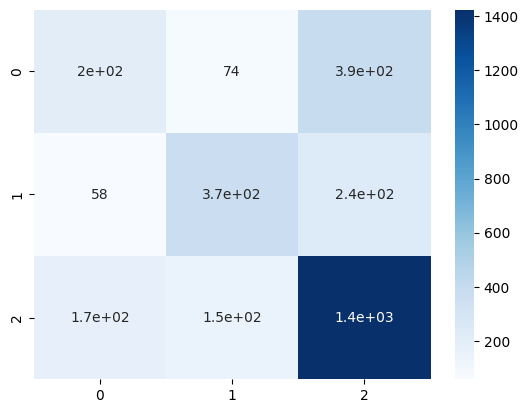

In [ ]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')#честно не знаю почему е но да ладно

In [ ]:
cf_matrix

array([[ 203,   74,  388],
       [  58,  366,  236],
       [ 171,  152, 1424]])

7)
тут просто нашел в инете код

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_cla = DecisionTreeClassifier()
tree_cla= tree_cla.fit(X_train,y_train)
y_pred_tree=tree_cla.predict(X_test)

In [ ]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(tree_cla, out_file=None, feature_names=X.columns))

задание на доп баллы

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X)

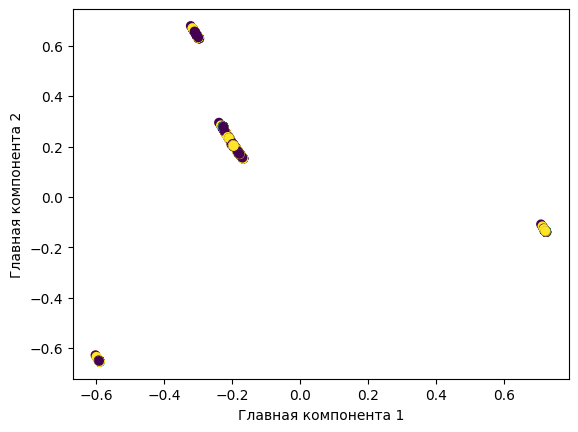

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis')
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()

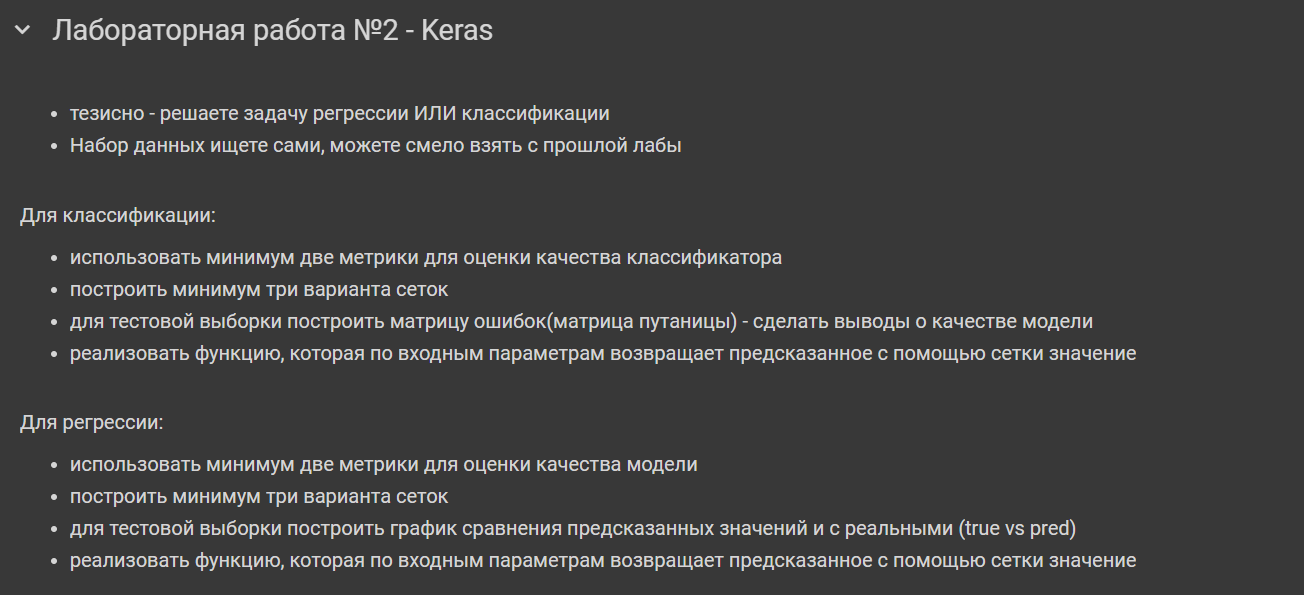

In [71]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [34]:
y = to_categorical(Y)

In [36]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=0)

In [66]:
model = keras.models.Sequential()
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])
history=model.fit(X_train, y_train, epochs =5,batch_size=5)

Epoch 1/5
1311/1311 [==============================] - 6s 3ms/step - loss: 0.8793 - accuracy: 0.6145 - f1_score: 0.4251
Epoch 2/5
1311/1311 [==============================] - 5s 4ms/step - loss: 0.8284 - accuracy: 0.6449 - f1_score: 0.5055
Epoch 3/5
1311/1311 [==============================] - 5s 4ms/step - loss: 0.8157 - accuracy: 0.6527 - f1_score: 0.5314
Epoch 4/5
1311/1311 [==============================] - 5s 4ms/step - loss: 0.8095 - accuracy: 0.6501 - f1_score: 0.5251
Epoch 5/5
1311/1311 [==============================] - 4s 3ms/step - loss: 0.8060 - accuracy: 0.6599 - f1_score: 0.5428


In [69]:
model1 = keras.models.Sequential()
model1.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(y.shape[1], activation='softmax'))
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])
history=model1.fit(X_train, y_train, epochs =20,batch_size=32)

Epoch 1/20
205/205 [==============================] - 1s 2ms/step - loss: 0.9038 - accuracy: 0.5982 - f1_score: 0.3567
Epoch 2/20
205/205 [==============================] - 0s 2ms/step - loss: 0.8488 - accuracy: 0.6365 - f1_score: 0.4524
Epoch 3/20
205/205 [==============================] - 0s 2ms/step - loss: 0.8250 - accuracy: 0.6441 - f1_score: 0.4819
Epoch 4/20
205/205 [==============================] - 0s 2ms/step - loss: 0.8176 - accuracy: 0.6515 - f1_score: 0.5018
Epoch 5/20
205/205 [==============================] - 0s 2ms/step - loss: 0.8128 - accuracy: 0.6553 - f1_score: 0.5131
Epoch 6/20
205/205 [==============================] - 0s 1ms/step - loss: 0.8105 - accuracy: 0.6574 - f1_score: 0.5191
Epoch 7/20
205/205 [==============================] - 0s 1ms/step - loss: 0.8105 - accuracy: 0.6585 - f1_score: 0.5194
Epoch 8/20
205/205 [==============================] - 0s 1ms/step - loss: 0.8061 - accuracy: 0.6585 - f1_score: 0.5240
Epoch 9/20
205/205 [============================

In [72]:
model2 = keras.models.Sequential()
model2.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(y.shape[1], activation='softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy","F1Score"])
history=model2.fit(X_train, y_train, epochs =10,batch_size=8)

Epoch 1/10
820/820 [==============================] - 2s 2ms/step - loss: 0.8725 - accuracy: 0.6209 - f1_score: 0.4367
Epoch 2/10
820/820 [==============================] - 2s 2ms/step - loss: 0.8329 - accuracy: 0.6458 - f1_score: 0.4880
Epoch 3/10
820/820 [==============================] - 2s 2ms/step - loss: 0.8194 - accuracy: 0.6510 - f1_score: 0.5125
Epoch 4/10
820/820 [==============================] - 2s 2ms/step - loss: 0.8145 - accuracy: 0.6539 - f1_score: 0.5191
Epoch 5/10
820/820 [==============================] - 2s 3ms/step - loss: 0.8124 - accuracy: 0.6566 - f1_score: 0.5303
Epoch 6/10
820/820 [==============================] - 2s 2ms/step - loss: 0.8088 - accuracy: 0.6588 - f1_score: 0.5371
Epoch 7/10
820/820 [==============================] - 2s 2ms/step - loss: 0.8036 - accuracy: 0.6588 - f1_score: 0.5406
Epoch 8/10
820/820 [==============================] - 2s 2ms/step - loss: 0.8020 - accuracy: 0.6615 - f1_score: 0.5424
Epoch 9/10
820/820 [============================

ВСЕ РАВНЫ +-

In [74]:
y_pred = model.predict(X_test)
y_classes = y_pred.argmax(axis=-1)
y_classes[:10]

64/64 [==============================] - 0s 3ms/step


array([1, 2, 1, 2, 1, 0, 2, 1, 2, 1])

In [75]:
le.inverse_transform(y_classes[:10])

array(['Плохо', 'Средний', 'Плохо', 'Средний', 'Плохо', 'Отличный',
       'Средний', 'Плохо', 'Средний', 'Плохо'], dtype=object)

In [80]:
y_test_old=y_test.argmax(axis=-1)

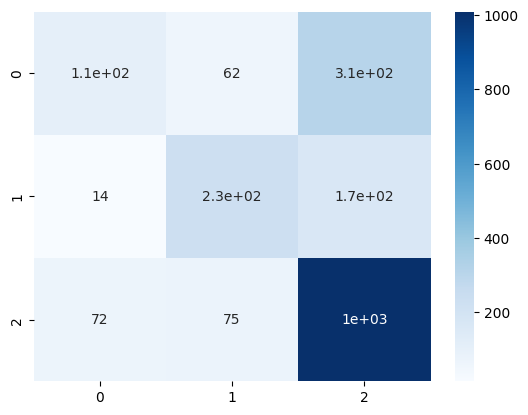

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test_old, y_classes)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')#честно не знаю почему е но да ладно

In [82]:
cf_matrix

array([[ 107,   62,  310],
       [  14,  231,  168],
       [  72,   75, 1009]])

In [86]:
import pickle
with open('lable_encoder.pkl', 'wb') as fp:
    pickle.dump(le,fp)
with open('scaler.pkl', 'wb') as fp:
    pickle.dump(scaler,fp)
with open('model.pkl','wb') as fp:
    pickle.dump(model,fp)

ну как и просто классификация без нейронок так что....

In [114]:
import copy

def predict_data(dat):
    x=copy.deepcopy(dat)
    with open('lable_encoder.pkl', 'rb') as fp:
        le = pickle.load(fp)
    with open('scaler.pkl', 'rb') as fp:
        scaler = pickle.load(fp)
    with open('model.pkl','rb') as fp:
        model = pickle.load(fp)
    x.budget.fillna(x.budget.median(),inplace=True)
    x.revenue.fillna(x.revenue.median(),inplace=True)
    x.runtime.fillna(x.runtime.median(),inplace=True)
    x.genre1.fillna(x.genre1.mode(),inplace=True)
    x[['runtime','budget','revenue']] = scaler.fit_transform(x[['runtime','budget','revenue']])
    x['genre1'] = x['genre1']. fillna ('драма')
    x=pd.get_dummies (x, columns=['genre1'])
    y_pred = model.predict(x)
    y_classes = y_pred.argmax(axis=-1)
    return le.inverse_transform(y_classes)

In [115]:
y_answer = predict_data(df[['runtime','budget','revenue','genre1']])

322/322 [==============================] - 1s 2ms/step


In [116]:
len(y_answer)

10282

In [117]:
len(df)

10282

In [118]:
y_answer

array(['Плохо', 'Плохо', 'Плохо', ..., 'Средний', 'Средний', 'Средний'],
      dtype=object)